In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
test_df = pd.read_csv('../data/test_data.csv')
print(test_df.shape)
print(list(test_df.columns))
test_df.head()

(557667, 17)
['order_id', 'order_value', 'order_items_count', 'customer_id', 'created_timestamp_local', 'has_instruction', 'logistics_dropoff_distance', 'delivery_postal_code', 'delivery_geohash_precision8', 'has_phone_number', 'has_call_instruction', 'has_leave_instruction', 'has_lift_instruction', 'has_lobby_instruction', 'has_gate_instruction', 'has_knock_instruction', 'has_bell_instruction']


,order_id,order_value,order_items_count,customer_id,created_timestamp_local,has_instruction,logistics_dropoff_distance,delivery_postal_code,delivery_geohash_precision8,has_phone_number,has_call_instruction,has_leave_instruction,has_lift_instruction,has_lobby_instruction,has_gate_instruction,has_knock_instruction,has_bell_instruction
0,y9ix-vzv1,7.8,1,sgykl4kd,2021-03-25T05:49:25,True,25.584016,238824,w21z7h5z,False,False,False,False,False,False,False,False
1,x6qu-16d1,16.2,8,d9xhu7ll,2021-03-25T05:49:31,True,40.927024,650244,w21z9j9s,False,False,False,False,False,False,False,False
2,e8jn-s0ej,19.7,9,b6ydw9ku,2021-03-25T05:49:46,True,16.516284,560564,w21zg3k5,False,False,False,False,False,False,False,False
3,y9ix-i1st,11.7,2,w7kht9qf,2021-03-25T05:49:50,False,1.763694,321109,w21ze395,False,False,False,False,False,False,False,False
4,x8ln-xugj,12.9,2,g4tpu7ow,2021-03-25T05:50:13,True,22.841840,310169,w21zdfrv,False,False,False,False,False,False,False,False


In [3]:
del test_df['logistics_dropoff_distance']

In [4]:
test_df.isnull().any()

order_id                       False
order_value                    False
order_items_count              False
customer_id                    False
created_timestamp_local        False
has_instruction                False
delivery_postal_code            True
delivery_geohash_precision8    False
has_phone_number               False
has_call_instruction           False
has_leave_instruction          False
has_lift_instruction           False
has_lobby_instruction          False
has_gate_instruction           False
has_knock_instruction          False
has_bell_instruction           False
dtype: bool

In [5]:
print('percent of nulls in postal code =',(test_df['delivery_postal_code'].isnull().sum()*100.0)/len(test_df))

percent of nulls in postal code = 9.05414880206288


In [6]:
for col,type_col in zip(test_df.columns.values,test_df.dtypes.values):
    if type_col == 'bool':
        test_df[col] = test_df[col].astype(np.int8)

In [7]:
# creating a unix timestamp column
date_format = '%Y-%m-%dT%H:%M:%S'
date_str_to_timestamp = lambda x: int(datetime.strptime(x,date_format).timestamp())
test_df['unix_timestamp'] = test_df['created_timestamp_local'].apply(date_str_to_timestamp)

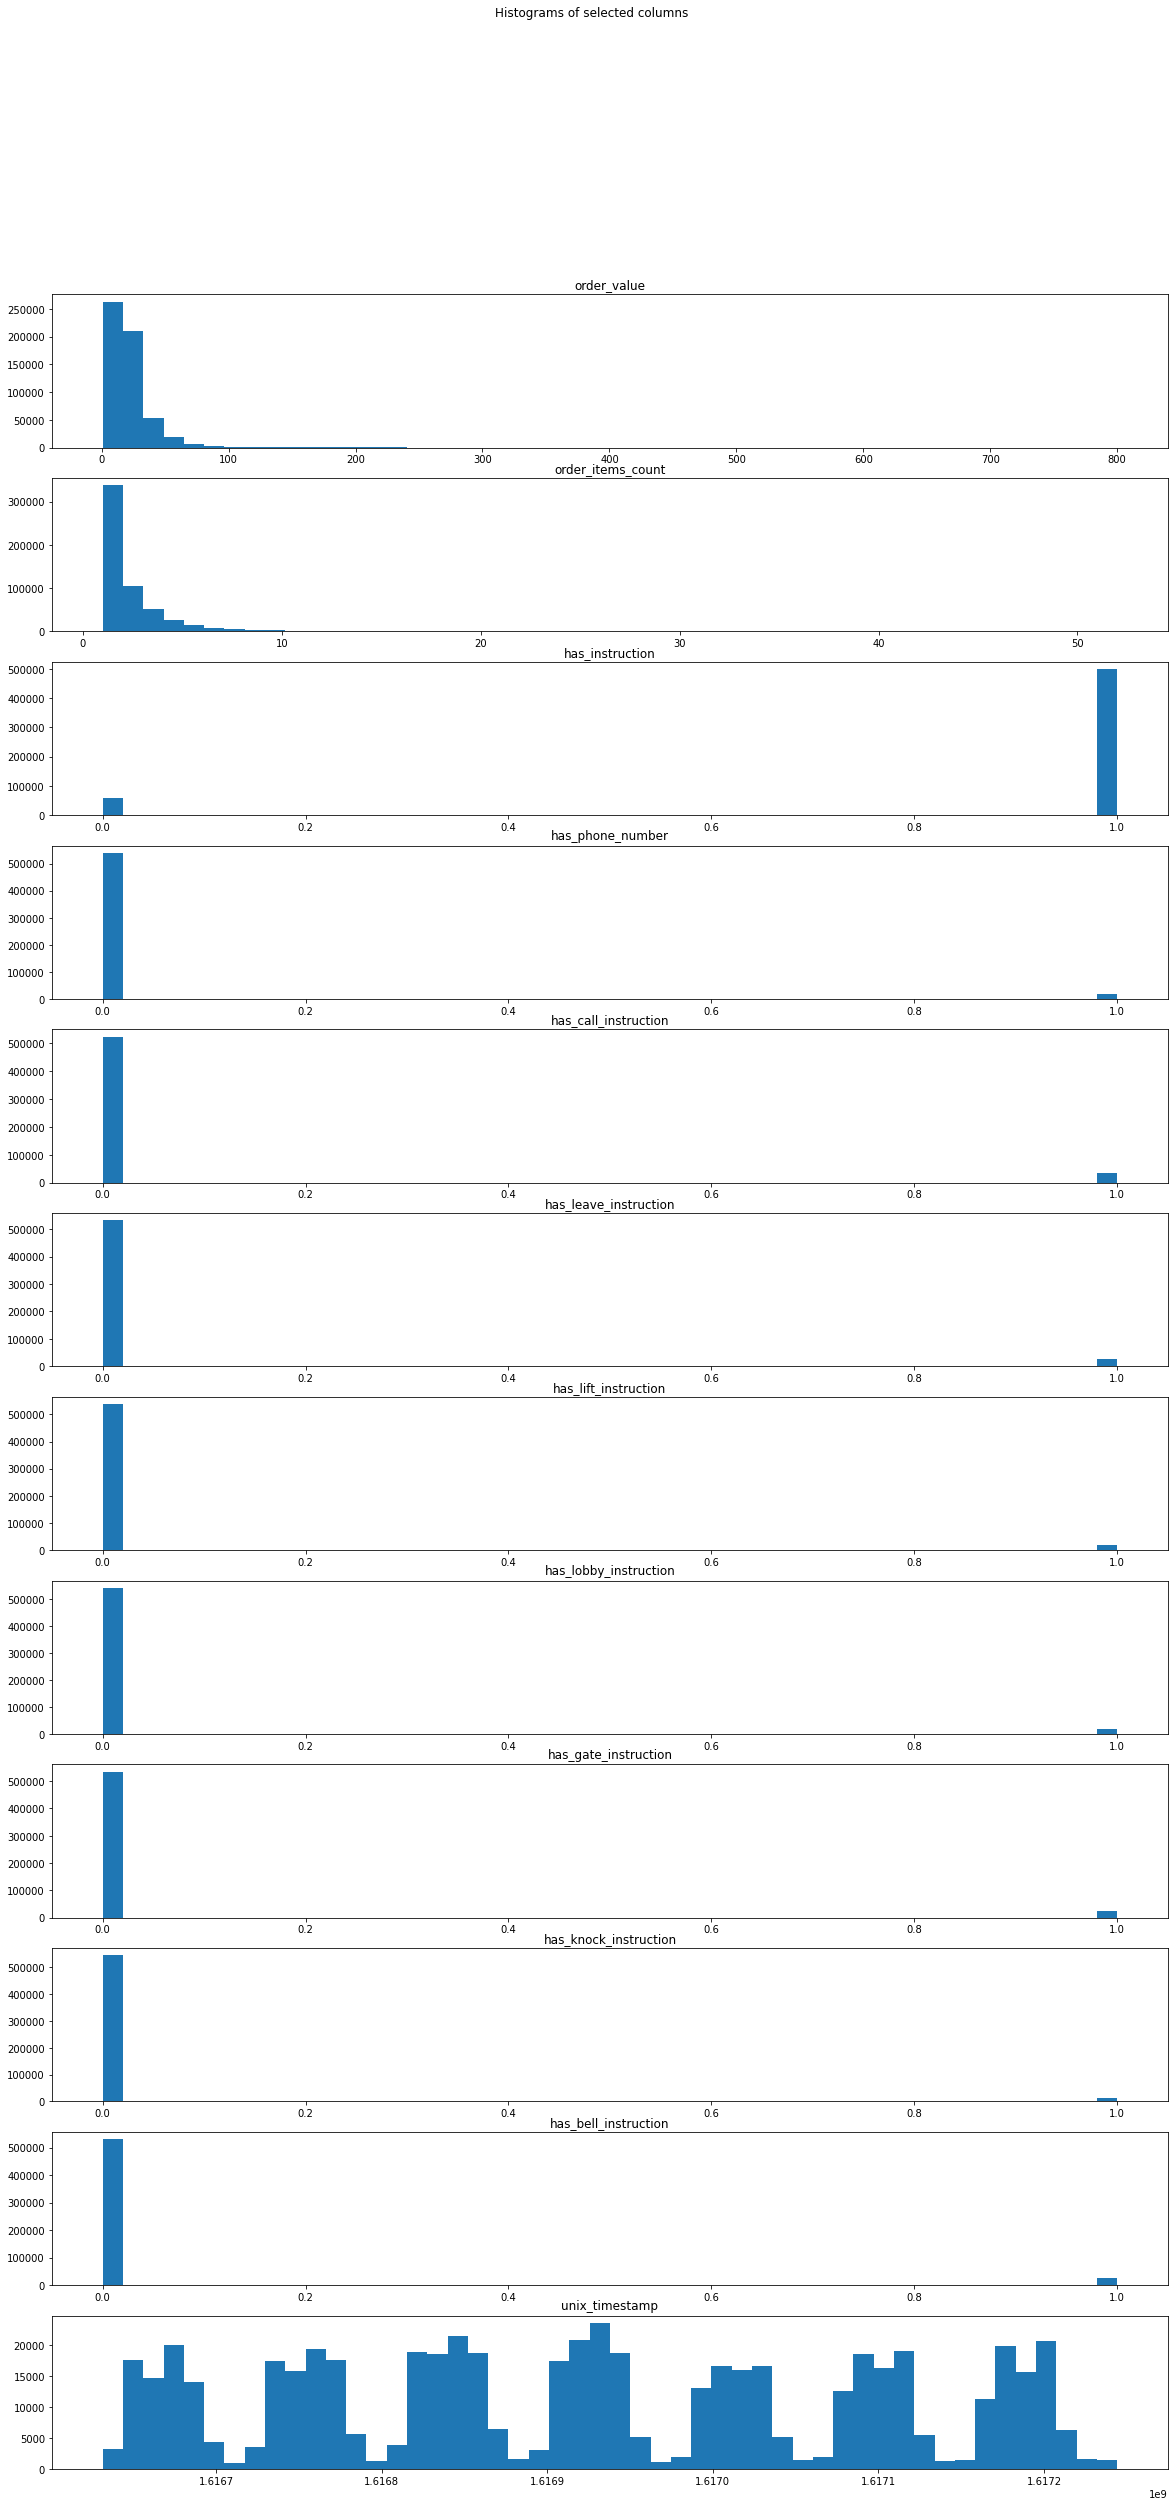

In [8]:
# histograms of some columns
columns = ['order_value', 'order_items_count', 'has_instruction', 'has_phone_number', 
           'has_call_instruction', 'has_leave_instruction', 'has_lift_instruction', 
           'has_lobby_instruction', 'has_gate_instruction', 'has_knock_instruction', 
           'has_bell_instruction', 'unix_timestamp']
fig, ax = plt.subplots(len(columns), figsize=(20,40))
fig.suptitle('Histograms of selected columns')
for i, col in enumerate(columns):
    ax[i].set_title(col)
    ax[i].hist(test_df[col], bins=50)    

In [9]:
test_df[columns].describe().round(3)

,order_value,order_items_count,has_instruction,has_phone_number,has_call_instruction,has_leave_instruction,has_lift_instruction,has_lobby_instruction,has_gate_instruction,has_knock_instruction,has_bell_instruction,unix_timestamp
count,557667.000,557667.000,557667.000,557667.000,557667.000,557667.000,557667.000,557667.000,557667.000,557667.000,557667.000,5.576670e+05
mean,21.894,2.658,0.896,0.032,0.060,0.046,0.036,0.029,0.041,0.023,0.049,1.616925e+09
std,16.777,2.023,0.305,0.177,0.237,0.210,0.186,0.168,0.199,0.149,0.216,1.707641e+05
min,0.800,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.616632e+09
25%,11.900,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.616771e+09
50%,17.450,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.616921e+09
75%,26.000,3.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.617085e+09
max,800.000,52.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.617244e+09


Start and End of timeseries =  2021-03-25T05:49:25 : 2021-04-01T07:59:59


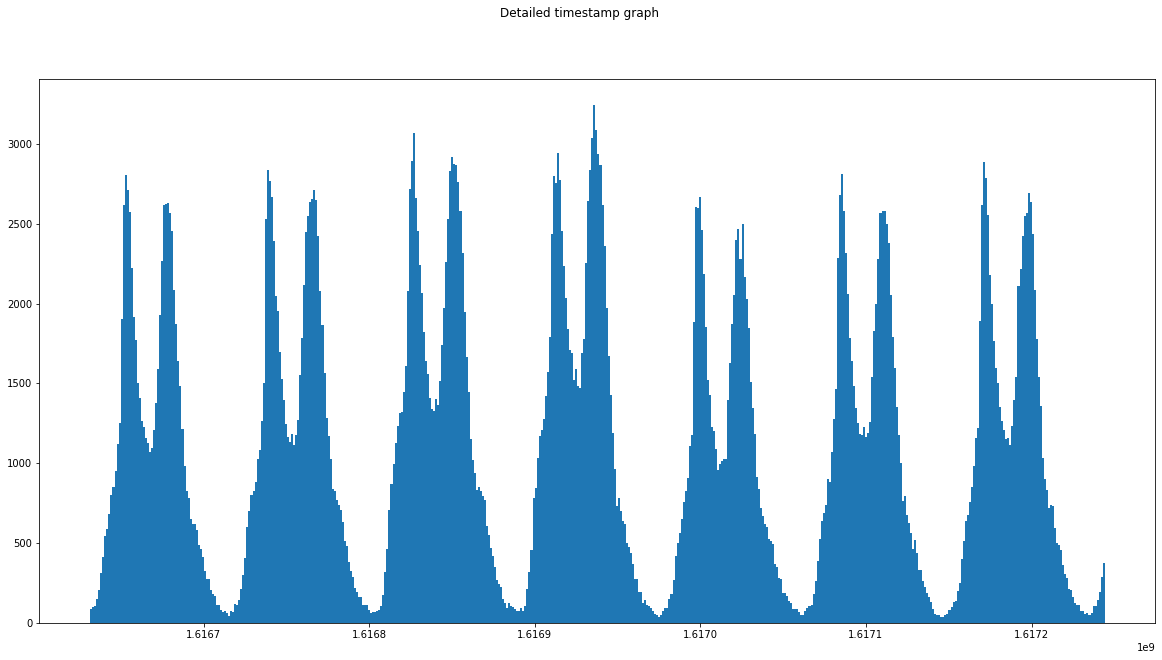

In [10]:
# timestamp analysis
print("Start and End of timeseries = ", min(test_df.created_timestamp_local),':',max(test_df.created_timestamp_local))
fig, ax = plt.subplots(1, figsize=(20,10))
fig.suptitle("Detailed timestamp graph")
_ = ax.hist(test_df.unix_timestamp, bins=500)

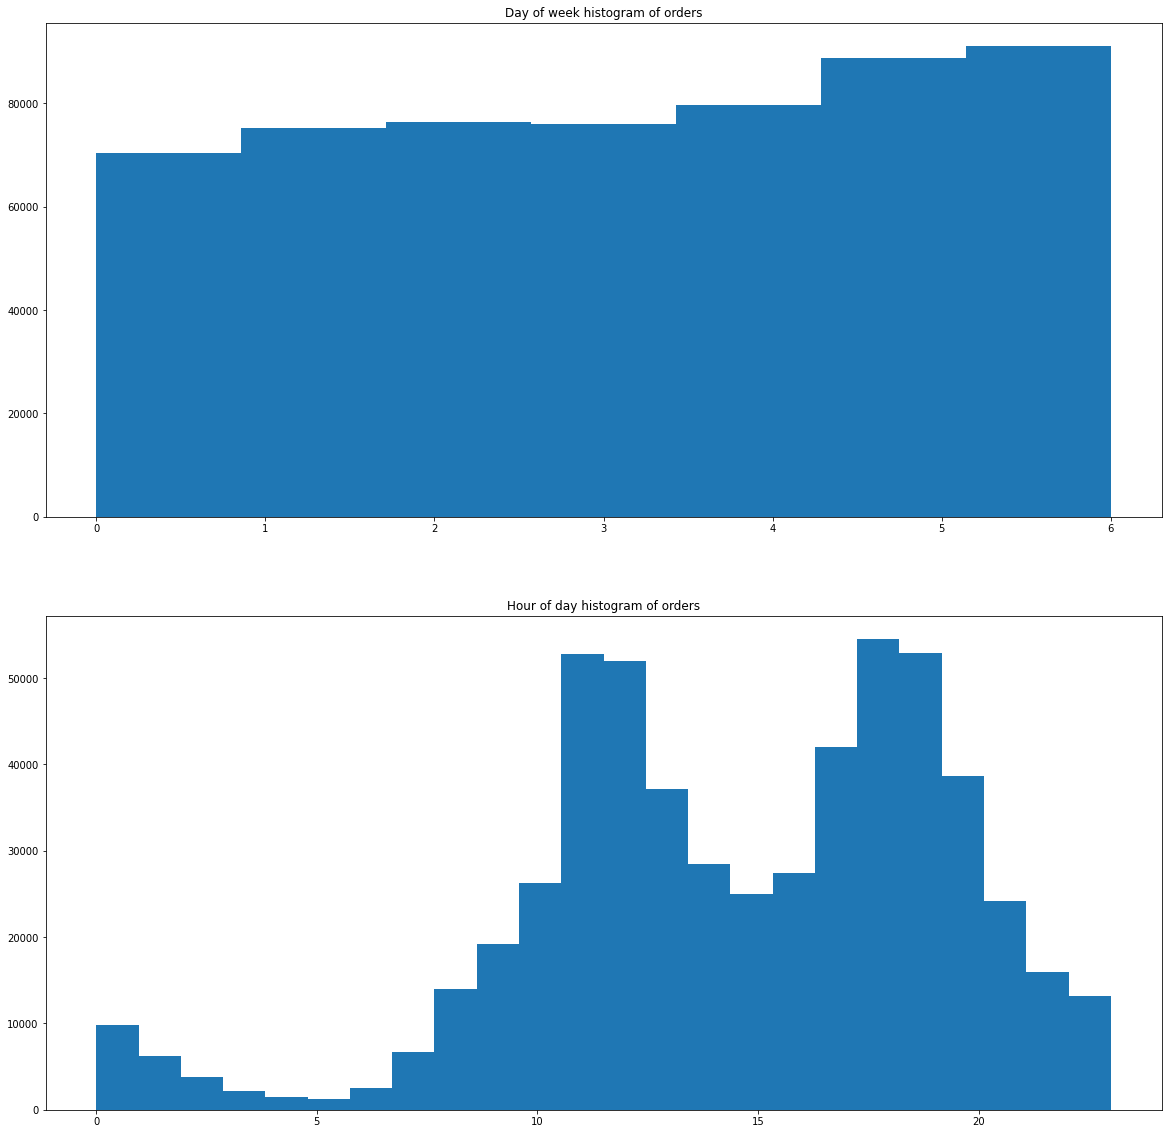

In [11]:
date_to_weekday = lambda x:datetime.strptime(x, date_format).weekday()
date_to_hour = lambda x:datetime.strptime(x, date_format).hour
date_to_day = lambda x:datetime.strptime(x, date_format).day
fig, ax = plt.subplots(2,figsize=(20,20))
ax[0].set_title("Day of week histogram of orders")
ax[0].hist(test_df.created_timestamp_local.apply(date_to_weekday), bins=7)
ax[1].set_title("Hour of day histogram of orders")
_ = ax[1].hist(test_df.created_timestamp_local.apply(date_to_hour), bins=24)

In [12]:
train_df = pd.read_csv('../data/train_data.csv')

In [13]:
# checking postalcodes
missing_postalcodes = set(test_df.delivery_postal_code.unique()) - set(train_df.delivery_postal_code.unique())
print('Number of test_dataset postal codes not in train_dataset =', len(missing_postalcodes))
print('Total pincodes in train dataset =', train_df.delivery_postal_code.unique().shape[0])
num_affected_rows = (test_df.delivery_postal_code.isin(missing_postalcodes)).sum()
print('Number of affected rows =',num_affected_rows,", Percent of affected rows =",(num_affected_rows*100.0)/len(test_df))

Number of test_dataset postal codes not in train_dataset = 2670
Total pincodes in train dataset = 45221
Number of affected rows = 3183 , Percent of affected rows = 0.5707707287682434


In [14]:
#checking geohashes
missing_geohashes = set(test_df.delivery_geohash_precision8.unique()) - set(train_df.delivery_geohash_precision8.unique())
print('Number of test_dataset geohashes not in train_dataset =', len(missing_geohashes))
print('Total geohashes in train dataset =', train_df.delivery_geohash_precision8.unique().shape[0])
num_affected_rows = (test_df.delivery_geohash_precision8.isin(missing_geohashes)).sum()
print('Number of affected rows =',num_affected_rows,", Percent of affected rows =",(num_affected_rows*100.0)/len(test_df))

Number of test_dataset geohashes not in train_dataset = 7026
Total geohashes in train dataset = 112647
Number of affected rows = 8905 , Percent of affected rows = 1.5968310837829744


In [15]:
#checking customers
missing_customers = set(test_df.customer_id.unique()) - set(train_df.customer_id.unique())
print('Number of test_dataset customers not in train_dataset =', len(missing_customers))
print('Total customers in train dataset =', train_df.customer_id.unique().shape[0])
num_affected_rows = (test_df.customer_id.isin(missing_customers)).sum()
print('Number of affected rows =',num_affected_rows,", Percent of affected rows =",(num_affected_rows*100.0)/len(test_df))

Number of test_dataset customers not in train_dataset = 50549
Total customers in train dataset = 515000
Number of affected rows = 62599 , Percent of affected rows = 11.225157665775454
